# Section 1
## Trouver une solution brute-force

- action : part de l'entreprise
- coût : prix d'achat de l'action
- bénéfice : gain réalisé à la revente de l'action après 2 ans

 3 contraintes :
 1. L'action ne peut être acheté qu'une fois.
 2. Il ne peut être acheté de fraction d'action.
 3. 500 euros maximum peuvent être investis.

 Solution Brute-force : 
   - Générer toutes les combinaisons possibles d'actions.
   - Filtrer celles qui respectent la contrainte de budget.
   - Calculer le bénéfice pour chaque combinaison valide.
   - Sélectionner la combinaison avec le bénéfice maximum.


In [ ]:
# Librairies installation nécessaires pour la visualisation et la manipulation des données
%pip install matplotlib seaborn pandas
%matplotlib widget


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


RuntimeError: 'widget' is not a recognised GUI loop or backend name

In [8]:
"""Version 1 (Brute Force) - For very light dataset"""

import csv
from itertools import combinations
from time import perf_counter

t_start = perf_counter()

def parse_benefit(coast, benefit_str):
    """Convertit le bénéfice en pourcentage vers une valeur absolue"""
    if isinstance(benefit_str, str) and benefit_str.endswith('%'):
        percentage = float(benefit_str.rstrip('%'))
        return (coast * percentage) / 100
    return float(benefit_str)

def read_actions_from_csv(file):
    """Lit les actions depuis un fichier CSV avec gestion des pourcentages"""
    actions = []
    with open(file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            coast = float(row['Coast'])
            benefit = parse_benefit(coast, row['Benefit'])
            actions.append({
                'name': row['Actions'],
                'coast': coast,
                'benefit': benefit
            })
    return actions

def find_best_combination(actions, max_budget=500):
    """Trouve la meilleure combinaison d'actions respectant le budget maximum"""
    best_combination = None
    max_benefit = 0
    n = len(actions)
    
    # Générer et évaluer toutes les combinaisons possibles
    for r in range(n + 1):
        for combo in combinations(actions, r):
            total_coast = sum(action['coast'] for action in combo)
            
            # Vérifier si la combinaison respecte le budget
            if total_coast <= max_budget:
                total_benefit = sum(action['benefit'] for action in combo)
                
                # Mettre à jour si c'est la meilleure combinaison
                if total_benefit > max_benefit:
                    max_benefit = total_benefit
                    best_combination = {
                        'actions': combo,
                        'total_coast': total_coast,
                        'total_benefit': total_benefit
                    }
    
    return best_combination

# Lecture des actions et recherche de la meilleure combinaison
actions = read_actions_from_csv('data/Actions.csv')
best = find_best_combination(actions)

# Affichage du résultat
if best:
    print(f"Best combination:")
    print(f"Total cost: {best['total_coast']:.2f} euros")
    print(f"Total benefit: {best['total_benefit']:.2f} euros")
    print(f"Selected actions:")
    for action in best['actions']:
        print(f"  - {action['name']}: {action['coast']:.2f}€ (benefit: {action['benefit']:.2f}€)")

t_stop = perf_counter()
print(f"\nTime taken: {t_stop - t_start:.4f} seconds")


Best combination:
Total cost: 498.00 euros
Total benefit: 99.08 euros
Selected actions:
  - Action-4: 70.00€ (benefit: 14.00€)
  - Action-5: 60.00€ (benefit: 10.20€)
  - Action-6: 80.00€ (benefit: 20.00€)
  - Action-8: 26.00€ (benefit: 2.86€)
  - Action-10: 34.00€ (benefit: 9.18€)
  - Action-11: 42.00€ (benefit: 7.14€)
  - Action-13: 38.00€ (benefit: 8.74€)
  - Action-18: 10.00€ (benefit: 1.40€)
  - Action-19: 24.00€ (benefit: 5.04€)
  - Action-20: 114.00€ (benefit: 20.52€)

Time taken: 0.9818 seconds


### Attention pour un dataset medium les temps dee calculs peuvent devenir long

In [11]:
"""Version 1 (Brute Force) - For medium large dataset (10^3 rows)"""

import csv
from itertools import combinations
from time import perf_counter

t_start = perf_counter()

def read_actions_from_csv(file):
    """Lit les actions depuis un fichier CSV avec gestion des pourcentages"""
    actions = []
    with open(file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            coast = float(row['price'])
            benefit = float(row['benefit_2y'])
            actions.append({
                'name': row['name'],
                'price': coast,
                'benefit_2y': benefit
            })
    return actions


def find_best_combination(actions, max_budget=500):
    """Trouve la meilleure combinaison d'actions respectant le budget
    maximum"""
    best_combination = None
    max_benefit = 0
    n = len(actions)
    
    # Générer et évaluer toutes les combinaisons possibles
    for r in range(n + 1):
        for combo in combinations(actions, r):
            total_coast = sum(action['price'] for action in combo)
            
            # Vérifier si la combinaison respecte le budget
            if total_coast <= max_budget:
                total_benefit = sum(action['benefit_2y'] for action in combo)
                
                # Mettre à jour si c'est la meilleure combinaison
                if total_benefit > max_benefit:
                    max_benefit = total_benefit
                    best_combination = {
                        'actions': combo,
                        'total_coast': total_coast,
                        'total_benefit': total_benefit
                    }
    
    return best_combination


# Lecture des actions et recherche de la meilleure combinaison
actions = read_actions_from_csv('data/dataset_1_cured.csv')
best = find_best_combination(actions)
# Affichage du résultat
if best:
    print("Best combination:")
    print(f"Total price: {best['total_coast']:.2f} euros")
    print(f"Total benefit: {best['total_benefit']:.2f} euros")
    print("Selected actions:")
    for action in best['actions']:
        print(f"  - {action['name']}: {action['coast']:.2f}€ "
              f"(benefit: {action['benefit']:.2f}€)")

t_stop = perf_counter()
print(f"\nTime taken: {t_stop - t_start:.4f} seconds")


KeyboardInterrupt: 

# Section 2
## Optimiser l'agorithme

### Livrables : 
- programme Python optimisé
- présentation PPT avec :
    - analyse algo force brute
    - diagramme/organigramme/pseudocode décrivant la solution optimisé
    - algorithme de la version optimisé et cas limites
    - comparaison des performances en utilisant la notation Big-O, la complexité temporelle et l'analyse de la mémoire


## Bénéfice (prix unitaire x profit en %) par rapport au prix d'achat de l'action

**! ATTENTION!** les fichiers datasets comportent plusieurs problèmes : 
- des NaN possibles
- des valeurs == 0.00
- des valeurs de "price" négatives
  
==> mise en place de filtres **droptna: NaN ; 'price'&'profit'>0 : pour neg & 0.00**


# Nettoyage & affichage dataset 1 :

1. Le premier script ouvre en r/w le fichier brut sélectionné.
2. Supprime toute les lignes dont les colonnes *price* ou *profit* contiennent un *NaN*, *0.00* ou un *float négatif*.
3. Calcule le bénéfice à deux ans, *benefit_2y* . 
4. L'inscrit dans la colonne du même nom dans un nouveau fichier de sortie : dataset_1_cured.csv

In [13]:
"""Nettoyage dataset_1 --> dataset_1_cured.csv"""
import pandas as pd

df = pd.read_csv("data/dataset_1.csv")

#Supprime toutes les lignes avec des valeurs nulles en prix et profit car ça n'aurait pas de sens de calculer
df = df.dropna(subset=['price', 'profit']) 
df = df[(df['price'] > 0) & (df['profit'] > 0)]

df['benefit_2y'] = df['price'] * df['profit'] / 100

df = df.sort_values("benefit_2y", ascending=False)
df.to_csv('data/dataset_1_cured.csv', index=False)

df

,name,price,profit,benefit_2y
738,Share-GRUT,498.76,39.42,196.611192
458,Share-YRSC,47.00,38.30,18.001000
362,Share-XKAM,47.01,38.10,17.910810
85,Share-AOLT,48.53,36.44,17.684332
102,Share-EKHU,47.13,35.03,16.509639
...,...,...,...,...
75,Share-CEBR,45.89,0.04,0.018356
845,Share-IQMC,0.35,2.81,0.009835
971,Share-DBUJ,0.07,10.73,0.007511
63,Share-BQZO,25.92,0.02,0.005184


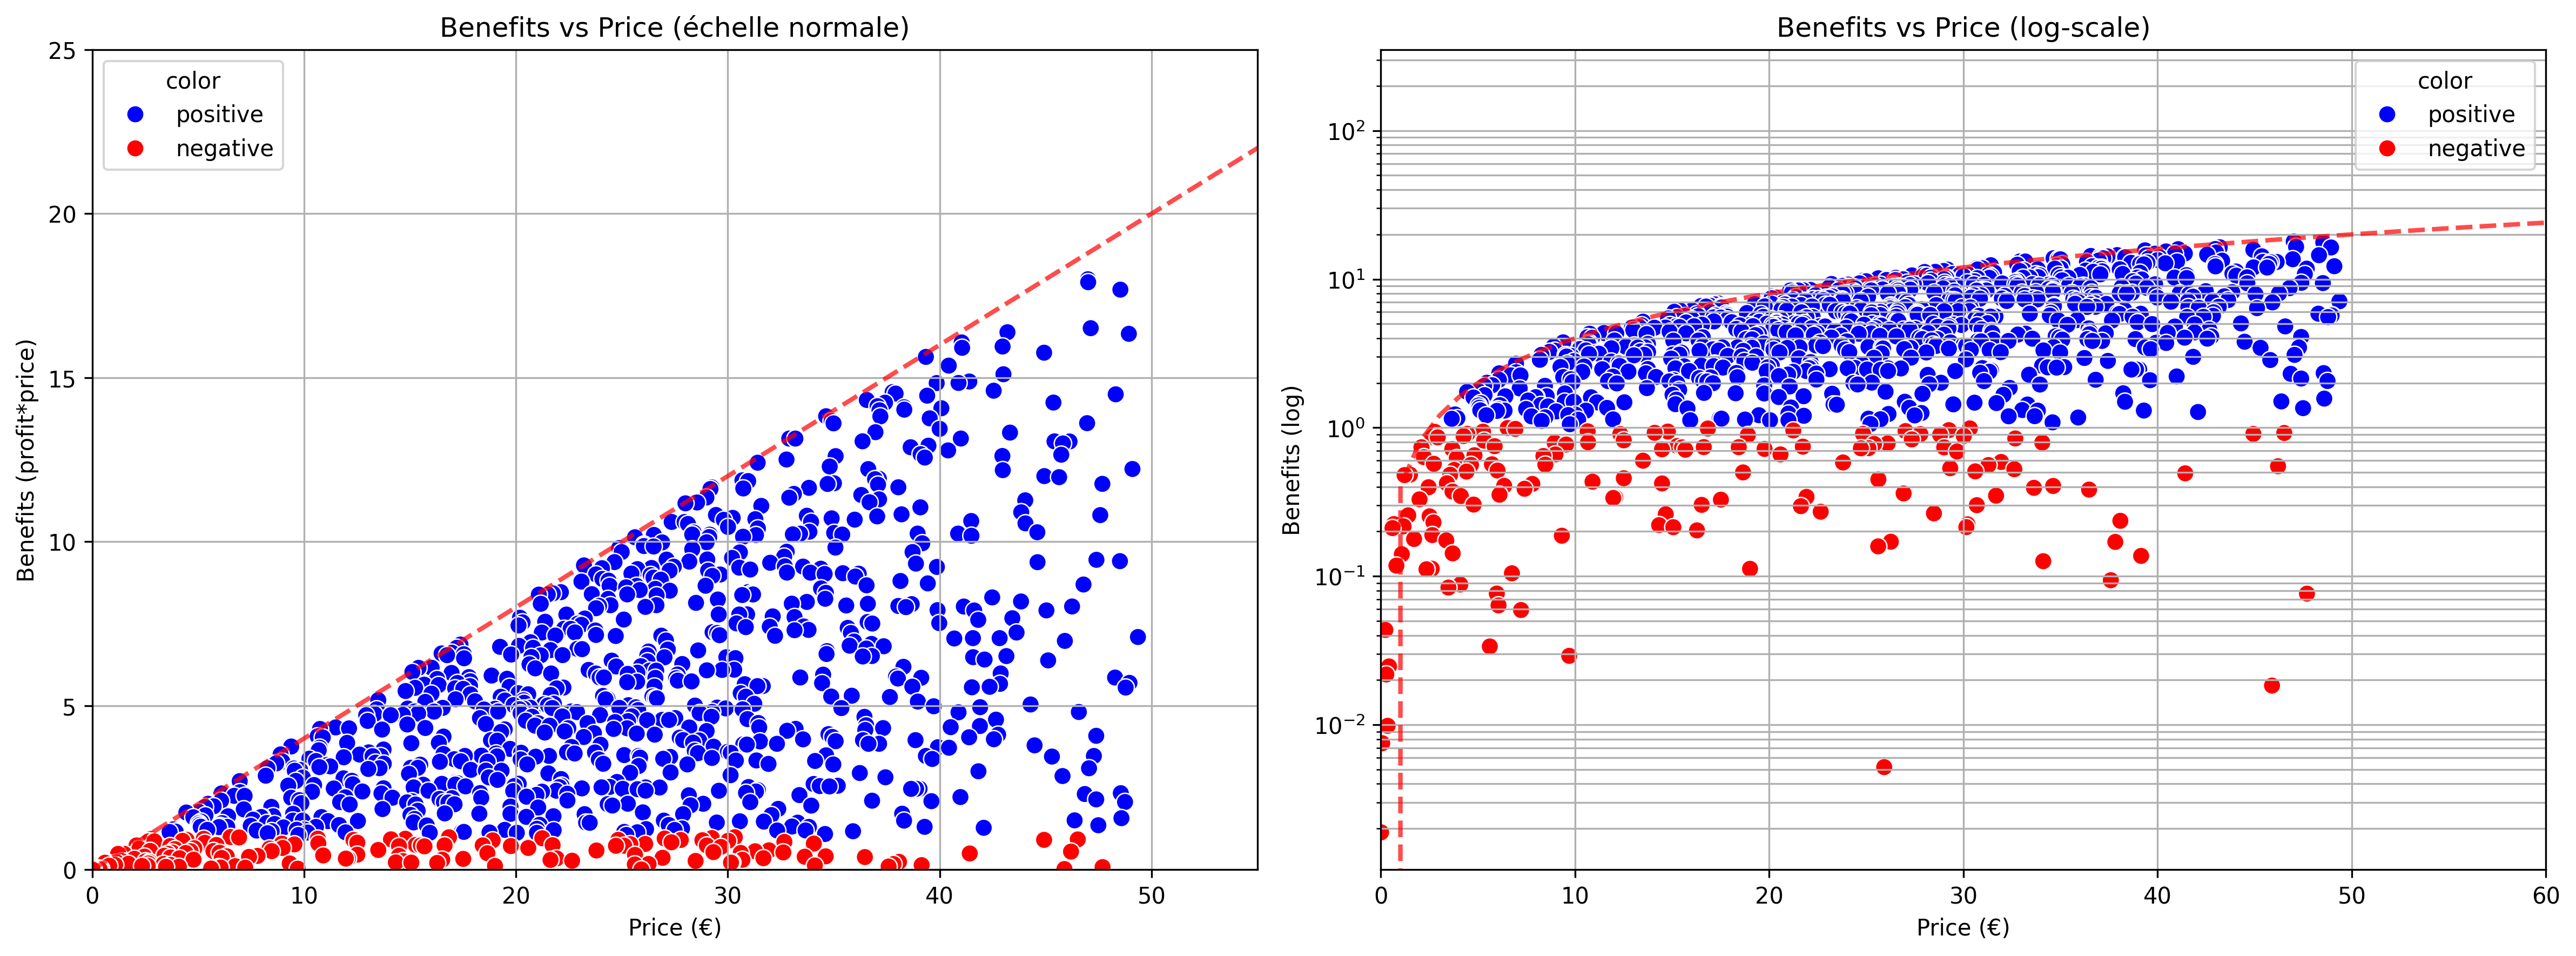

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/dataset_1_cured.csv')

# Coloration selon ton critère (< 1 → rouge, sinon bleu)
df['color'] = df['benefit_2y'].apply(lambda v: 'negative' if v < 1 else 'positive')

# ----------------------------
# Deux graphiques côte à côte
# ----------------------------
plt.figure(figsize=(16, 6), dpi=300)

# -------------------------
# GRAPHIQUE 1 : échelle normale
# -------------------------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'red', 'positive': 'blue'},
    s=60,
    marker='o'
)

# Fixe la fonction de référence y = 40x
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 0.4*x_values, 'r--', linewidth=2, label='y = 40x', alpha=0.7)

plt.title("Benefits vs Price (échelle normale)")
plt.xlim(0, 55)
plt.xlabel("Price (€)")
plt.ylabel("Benefits (profit*price)")
plt.ylim(0, 25)
plt.grid(True)

# -------------------------
# GRAPHIQUE 2 : échelle logarithmique
# -------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'red', 'positive': 'blue'},
    s=60,
    marker='o'
)

# Fixe la fonction de référence y = 40x
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 0.4*x_values, 'r--', linewidth=2, label='y = 40x', alpha=0.7)

plt.yscale('log')  # <-- Échelle logarithmique
plt.title("Benefits vs Price (log-scale)")
plt.xlabel("Price (€)")
plt.xlim(0, 60)
plt.ylabel("Benefits (log)")
plt.grid(True, which='both')

plt.tight_layout()   # évite le chevauchement
plt.show()


# Nettoyage & affichage dataset 2 :

1. Le premier script ouvre en r/w le fichier brut sélectionné.
2. Supprime toute les lignes dont les colonnes *price* ou *profit* contiennent un *NaN*, *0.00* ou un *float négatif*.
3. Calcule le bénéfice à deux ans, *benefit_2y* . 
4. L'inscrit dans la colonne du même nom dans un nouveau fichier de sortie : dataset_2_cured.csv

In [14]:
"""Nettoyage dataset_2 --> dataset_2_cured.csv"""
import pandas as pd

df = pd.read_csv("data/dataset_2.csv")

#Supprime toutes les lignes avecdes valeur nulles eb prix et profit car ça n'aurait pas de sens de calculer
df = df.dropna(subset=['price', 'profit']) 
df = df[(df['price'] > 0) & (df['profit'] > 0)]

df['benefit_2y'] = df['price'] * df['profit'] / 100

df.sort_values("benefit_2y", ascending=False)
df.to_csv('data/dataset_2_cured.csv')

df

,name,price,profit,benefit_2y
0,Share-MOEX,40.60,16.69,6.776140
1,Share-GBGY,27.08,34.09,9.231572
3,Share-FJTI,33.50,20.81,6.971350
4,Share-LGDP,15.26,3.40,0.518840
5,Share-GEBJ,5.87,37.95,2.227665
...,...,...,...,...
991,Share-JSJH,28.84,34.45,9.935380
992,Share-ICHU,28.94,11.52,3.333888
995,Share-GYES,12.71,25.90,3.291890
997,Share-ECAQ,31.66,39.49,12.502534


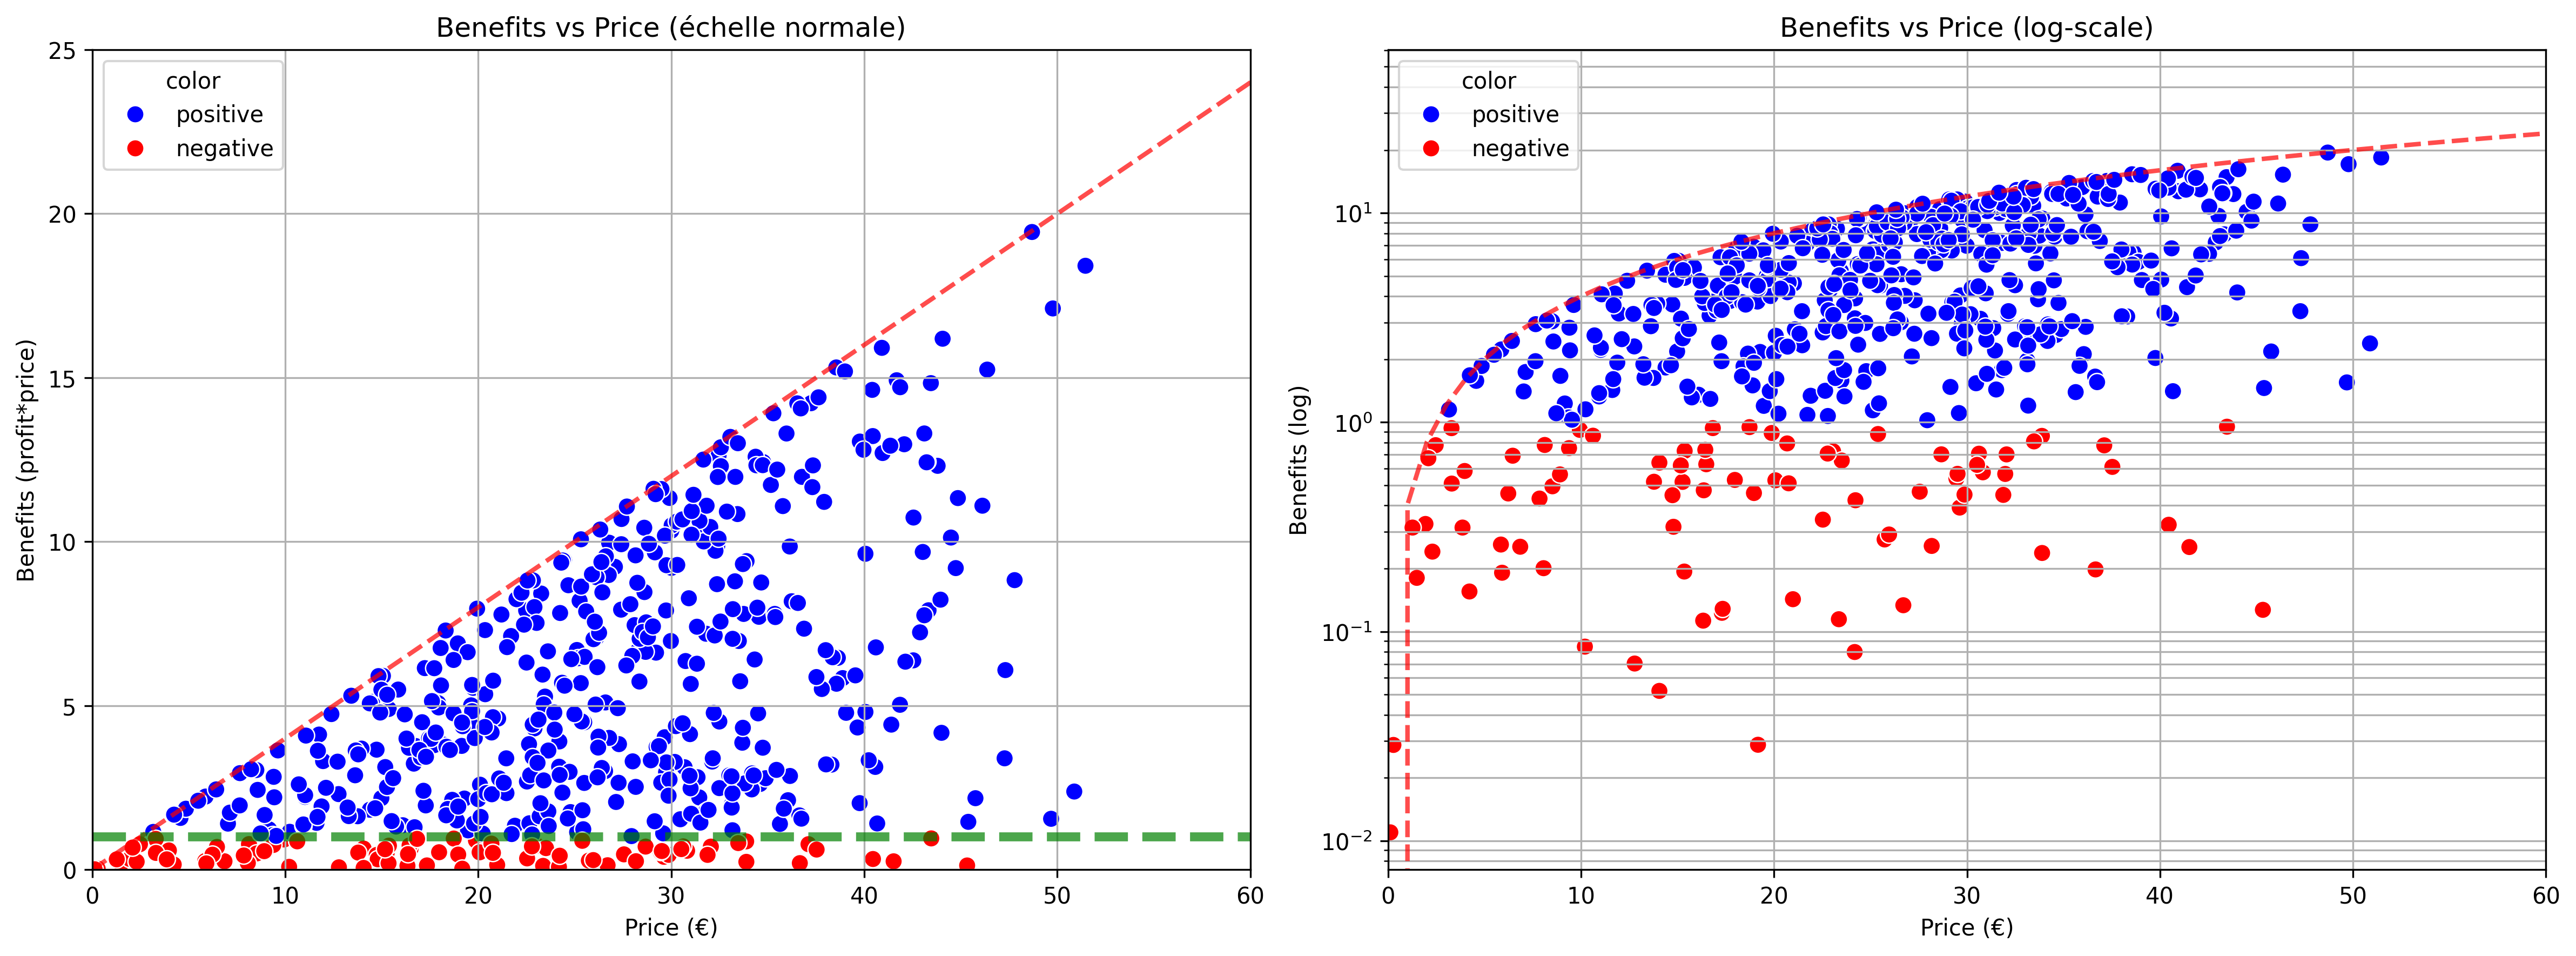

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/dataset_2_cured.csv')

# Coloration selon ton critère (< 1 → rouge, sinon bleu)
df['color'] = df['benefit_2y'].apply(lambda v: 'negative' if v < 1 else 'positive')

# ----------------------------
# Deux graphiques côte à côte
# ----------------------------
plt.figure(figsize=(16, 6), dpi=300)

# -------------------------
# GRAPHIQUE 1 : échelle normale
# -------------------------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'red', 'positive': 'blue'},
    s=60,
    marker='o'
)

# Fixe la fonction de référence y = 40x & y= 1
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 0.4*x_values, 'r--', linewidth=2, label='y = 40x', alpha=0.7)
plt.plot(x_values, np.ones_like(x_values), 'g--', linewidth=4, label='y = 1', alpha=0.7)

plt.title("Benefits vs Price (échelle normale)")
plt.xlim(0, 60)
plt.ylim(0, 25)
plt.xlabel("Price (€)")
plt.ylabel("Benefits (profit*price)")
plt.grid(True)

# -------------------------
# GRAPHIQUE 2 : échelle logarithmique
# -------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'red', 'positive': 'blue'},
    s=60,
    marker='o'
)

# Fixe la fonction de référence y = 40x
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 0.4*x_values, 'r--', linewidth=2, label='y = 40x', alpha=0.7)

plt.yscale('log')  # <-- Échelle logarithmique
plt.title("Benefits vs Price (log-scale)")
plt.xlabel("Price (€)")
plt.xlim(0, 60)
plt.ylabel("Benefits (log)")

plt.grid(True, which='both')

plt.tight_layout()   # évite le chevauchement
plt.show()


### Observations: 

- Les **actions** les plus profitables, **optimisées** c'est à dire celle qui **minimisent le risque** (somme engagée) et **maximisent les bénéfices**.
  
- Quelques soit le dataset (1 ou 2 version cured) les actions optimisé ne dépassent pas (approximativement) **y=40x**. Il faut affiner cette équation afin de pouvoir s'en servir afin de mesurer la *distance à l'optimum*. 
  
- Il suffira de composer le portefeuille avec :
   1. Les actions par ordre croissant de distance à l'optimum
   2. Compléter avec des optimum de faible volume ('price')
   3. Envisager la suppression de la dernières action si il existe un *sous-groupe d'actions* optimisant le volume restant et maximisant (ou égalant) les bénéfices.
   
En ne recherchant parmis que les actions avec le plus haut potentiel on limite le nombre d'opération, même pour un algorithme de brute-force et permet déjà de gagner de la vitesse de calcul.

In [4]:
### Affichage du tableau trié par bénéfice sur 2 ans - dataset 1_cured.csv
import pandas as pd

df = pd.read_csv("data/dataset_1_cured.csv")

print(f'Tableau trié par bénéfice sur 2 ans :')
df.sort_values('benefit_2y', ascending=False)


Tableau trié par bénéfice sur 2 ans :


,Unnamed: 0,name,price,profit,benefit_2y
704,738,Share-GRUT,498.76,39.42,19661.1192
439,458,Share-YRSC,47.00,38.30,1800.1000
347,362,Share-XKAM,47.01,38.10,1791.0810
81,85,Share-AOLT,48.53,36.44,1768.4332
97,102,Share-EKHU,47.13,35.03,1650.9639
...,...,...,...,...,...
71,75,Share-CEBR,45.89,0.04,1.8356
806,845,Share-IQMC,0.35,2.81,0.9835
928,971,Share-DBUJ,0.07,10.73,0.7511
59,63,Share-BQZO,25.92,0.02,0.5184


On voit que l'action **Share-GRUT** (qui est celle de la décision d'achat 1) occupe **498.76 des 500** possible. il reste donc **1.24 de volume à allouer**.
On peut donc y associer des actions qui une fois les price additionné le volume reste inférieur ou égale à 1.24. Par exemple : 
  - Share-MLGM : 0.01
  - Share-IQMC : 0.07
  - etc...

Mais si au lieu de prendre en premier Share-GRUT (volume 498.76) on choisit une une autre action, la seconde Share-YRSC (vol. 47.00) ? La différence se fait sur le bénéfice d'un facteur 10, **est-il possible d'avoir un bouquet d'actions d'un volume total inférieur à 498.76 et une masse totale (benefit) sup. ou égale à 19 661.1192 ?**
*

In [15]:
import pandas as pd
from time import perf_counter

t_start = perf_counter()

df = pd.read_csv("data/dataset_2_cured.csv")
df = df.sort_values('benefit_2y', ascending=False)

total_price = 0
total_benefit = 0
selected_actions = []

for index, row in df.iterrows():
    if total_price + row['price'] <= 500:
        total_price += row['price']
        total_benefit += row['benefit_2y']
        selected_actions.append({
            'name': row['name'],
            'price': row['price'],
            'benefit': row['benefit_2y']
        })

print(f"Prix total du bouquet d'actions: {total_price:.2f} euros")
print(f"Profit total des actions sélectionnées sur 2 ans: {total_benefit:.2f} euros")
print(f"Nombre d'actions: {len(selected_actions)}")
print("\nActions sélectionnées :")
for action in selected_actions:
    print(f" - {action['name']:20s} - {action['price']:8.2f}€ (bénéfice : {action['benefit']:12.2f}€)")

t_stop = perf_counter()
print(f"\nTime taken: {t_stop - t_start:.4f} seconds")

Prix total du bouquet d'actions: 499.62 euros
Profit total des actions sélectionnées sur 2 ans: 182.62 euros
Nombre d'actions: 14

Actions sélectionnées :
 - Share-JWGF           -    48.69€ (bénéfice :        19.44€)
 - Share-MBQU           -    51.46€ (bénéfice :        18.41€)
 - Share-QEVK           -    49.77€ (bénéfice :        17.11€)
 - Share-DLNE           -    44.06€ (bénéfice :        16.19€)
 - Share-IJFT           -    40.91€ (bénéfice :        15.91€)
 - Share-ANFX           -    38.55€ (bénéfice :        15.31€)
 - Share-MALJ           -    46.37€ (bénéfice :        15.25€)
 - Share-OPBR           -    39.00€ (bénéfice :        15.19€)
 - Share-FWMV           -    41.68€ (bénéfice :        14.92€)
 - Share-HATC           -    43.45€ (bénéfice :        14.83€)
 - Share-XGNC           -    41.86€ (bénéfice :        14.71€)
 - Share-XQII           -    13.42€ (bénéfice :         5.30€)
 - Share-DYVD           -     0.28€ (bénéfice :         0.03€)
 - Share-LKSD           - 

# Section 3
## Backtestez et optimisez

Tester le programmer sur deux datasets et comparer les décisions d'achat.

## Résultats: 

Le script optimisé donne de bon résultats en temps et de meilleur pronostique sur les portefeuilles d'actions, quelque soit le dataset.

## Idées optimisation:

- pour gagner du temps sur le choix des optimums en **prix** et en **bénéfices** il est possible de réduire le nombre d'action pouvant *combler le volume restant* en limitant la rechecher à un sous-ensemble définit par toutes les actions au voisinage de y = 40x + 1

